In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(destiny))
suppressMessages(library(cowplot))

In [2]:
obj.rna <- readRDS("../../../snRNA/from_rico/ct_data/Myeloid/Myeloid_states.rds")

In [3]:
obj.rna

An object of class Seurat 
28933 features across 21082 samples within 1 assay 
Active assay: RNA (28933 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [4]:
head(obj.rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,doublet_score,doublet,dissociation_s1,opt_clust,patient,batch,opt_clust_integrated,cell_type,RNA_snn_res.0.2,RNA_snn_res.0.4,RNA_snn_res.0.6,RNA_snn_res.0.8,RNA_snn_res.1,seurat_clusters,opt_state
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCCATCACGAGGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1113,814,0.44014085,0.0001556255,singlet,0.2325505,3,P1,A,4,Myeloid,0,0,2,2,2,2,0
AAACGAACAGGAATAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4618,2595,0.02153316,0.0285093170,singlet,0.1098328,7,P1,A,10,Myeloid,0,0,1,1,1,1,0
AAAGAACAGAAAGTCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1174,874,0.33305579,0.0006721488,singlet,0.1226825,3,P1,A,4,Myeloid,1,1,0,0,0,0,1
AAAGGGCCAATGGCCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1427,1035,0.06891799,0.0001543298,singlet,0.1219370,3,P1,A,4,Myeloid,0,0,2,2,2,2,0
AAAGGGCGTCGTTGGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,811,668,0.24067389,0.0001427952,singlet,0.1066309,3,P1,A,4,Myeloid,1,1,0,0,0,0,1
AAAGTCCCATTCAGCA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2320,1553,0.21267546,0.0003508294,singlet,0.1060945,3,P1,A,4,Myeloid,0,0,2,7,7,7,0


In [5]:
## add annotation for samples
df_sample_annotation <- read.csv("../../../snRNA/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK158,control,P1,control_P1,group_1
2,CK162,FZ/GT,P4,FZ/GT_P4,group_3
3,CK165,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK163,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK161,IZ,P3,IZ_P3,group_2
6,CK160,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
obj.rna@meta.data$region <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_region)
obj.rna@meta.data$patient <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient)
obj.rna@meta.data$patient_region_id <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_region)
obj.rna@meta.data$patient_group <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_group)

In [7]:
df_cell_count <- as.data.frame(obj.rna@meta.data) %>%
    group_by(orig.ident) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

df_cell_count

orig.ident,count
<chr>,<int>
CK368,2704
CK361,1348
CK158,1340
CK371,1288
CK160,1240
CK164,1110
CK365,1065
CK373,927
CK364,864


In [8]:
# we remove samples with less than 50 cells
df_cell_count <- subset(df_cell_count, count > 200)
obj.rna.sub <- subset(obj.rna, orig.ident %in% df_cell_count$orig.ident)

obj.rna.sub

An object of class Seurat 
28933 features across 20744 samples within 1 assay 
Active assay: RNA (28933 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [9]:
obj.rna.sub <- obj.rna.sub %>% 
        NormalizeData() %>%
        FindVariableFeatures() %>%
        ScaleData() %>%
        RunPCA(verbose = FALSE) %>%
        RunUMAP(dims = 1:30)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:20:33 UMAP embedding parameters a = 0.9922 b = 1.112

15:20:33 Read 20744 rows and found 30 numeric columns

15:20:33 Using Annoy for neighbor search, n_neighbors = 30

15:20:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:20:35 Writing NN index file to temp file /tmp/RtmpV9ufh4/file39abec70de358

15:20:35 Searching Annoy index using 1 thread, search_k = 3000

15:20:41 Annoy recall = 100%

15:20:42 Commencing smooth kNN distance calibration usin

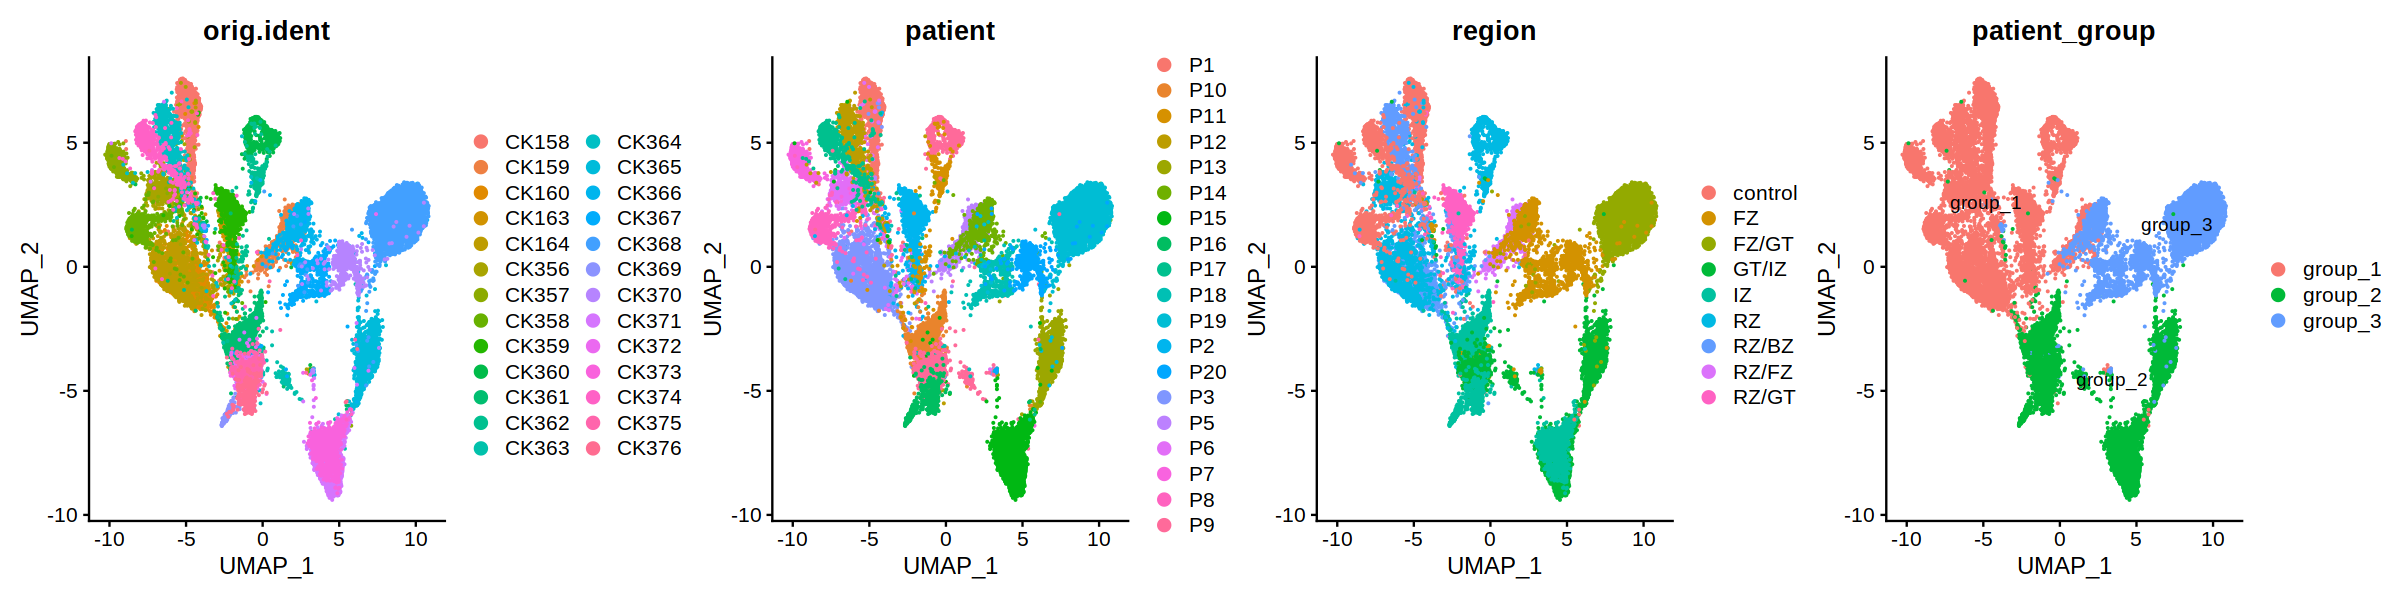

In [10]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1037200)”
Harmony 1/30

Harmony 2/30

Harmony 3/30

Harmony 4/30

Harmony 5/30

Harmony 6/30

Harmony 7/30

Harmony 8/30

Harmony 9/30

Harmony 10/30

Harmony 11/30

Harmony 12/30

Harmony 13/30

Harmony 14/30

Harmony converged after 14 iterations



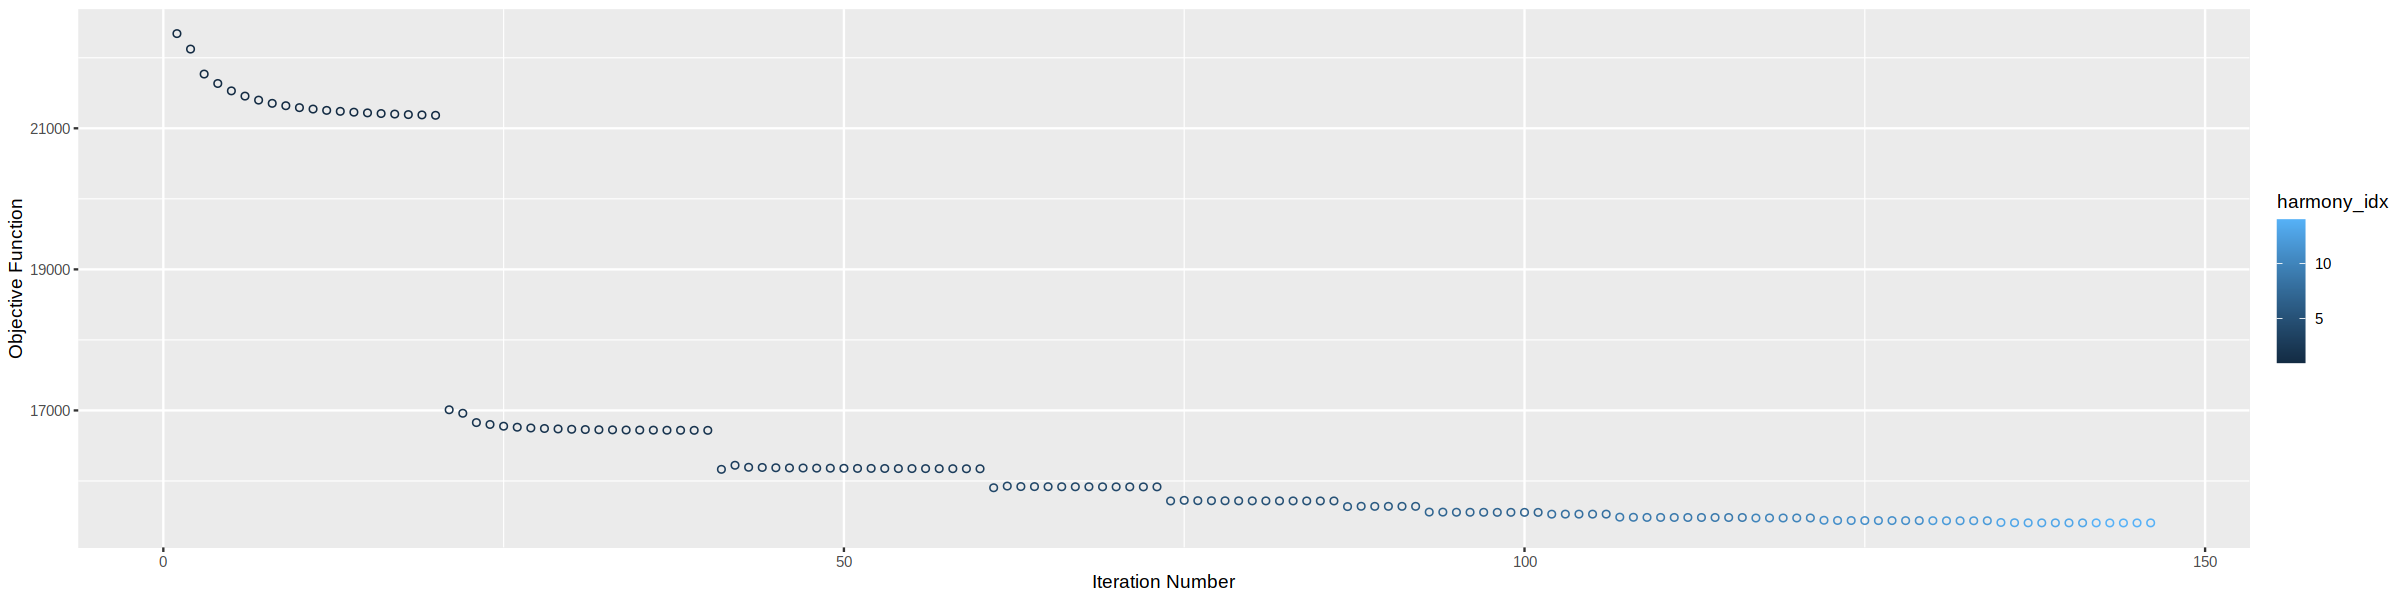

In [11]:
obj.rna.sub <- RunHarmony(obj.rna.sub, 
                      group.by.vars = c("orig.ident", "patient", "region"),
                     reduction = "pca", 
                      max.iter.harmony = 30, 
                      dims.use = 1:30,
                     project.dim = FALSE,
                     plot_convergence = TRUE)


obj.rna.sub <- RunUMAP(obj.rna.sub, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony",
               reduction.ke = 'umapharmony_',
              verbose = FALSE,
                   min.dist = 0.4)

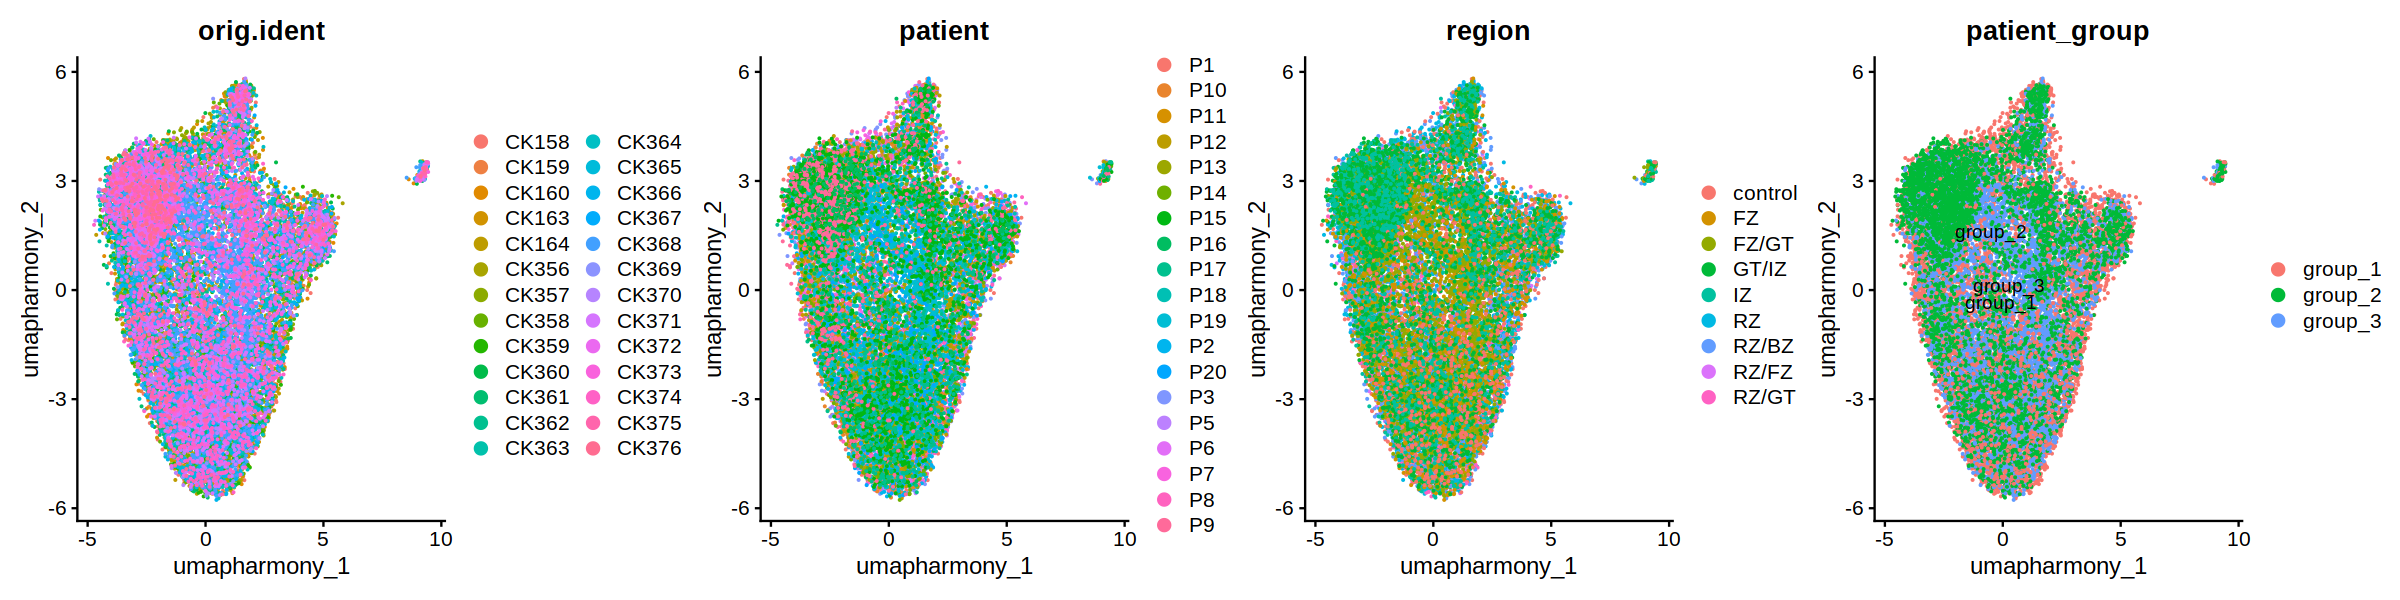

In [12]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

In [18]:
obj.rna.sub <- FindNeighbors(obj.rna.sub, reduction = "harmony", dims = 1:30)
obj.rna.sub <- FindClusters(obj.rna.sub, resolution = 0.1, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



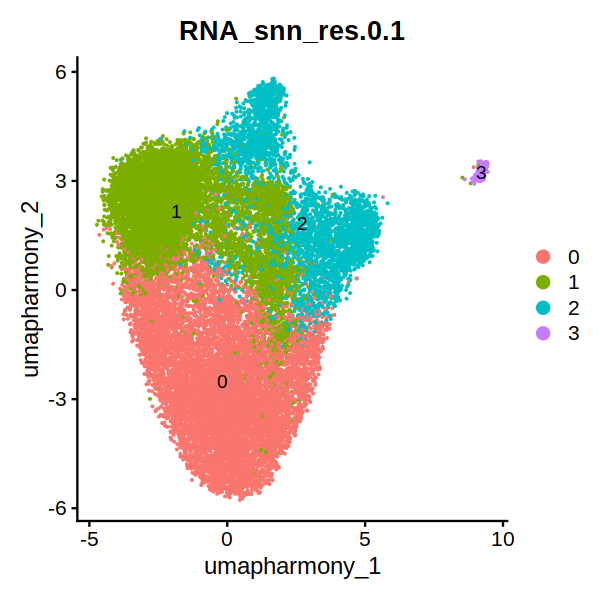

In [17]:
options(repr.plot.height = 5, repr.plot.width = 5)
DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "RNA_snn_res.0.1", label = TRUE)

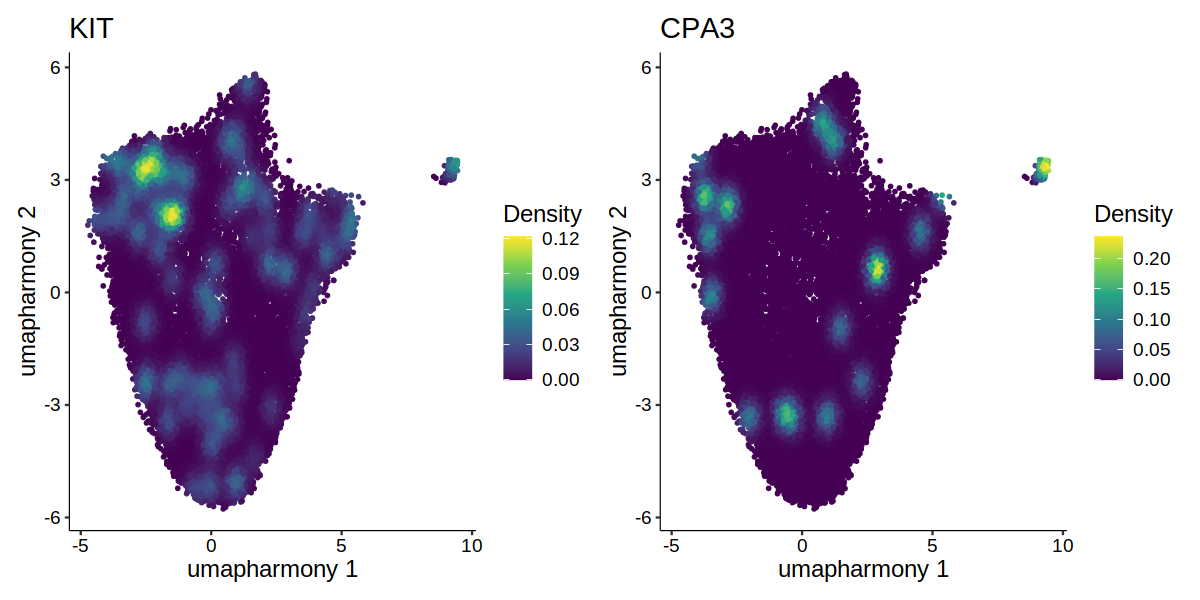

In [21]:
suppressMessages(library(Nebulosa))

options(repr.plot.height = 5, repr.plot.width = 10)

p1 <- plot_density(obj.rna.sub, features="KIT", reduction="umap_harmony")
p2 <- plot_density(obj.rna.sub, features="CPA3", reduction="umap_harmony")

patchwork::wrap_plots(list(p1, p2), nrow = 1)

In [ ]:
if(!dir.exists("../data/snRNA")){
    dir.create("../data/snRNA")
}

In [ ]:
# find marker
Idents(obj.rna.sub) <- "RNA_snn_res.0.1"

all.markers <- FindAllMarkers(obj.rna.sub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

# Dot plots - the size of the dot corresponds to the percentage of cells expressing the
# feature in each cluster. The color represents the average expression level
options(repr.plot.height = 4, repr.plot.width = 15)
DotPlot(obj.rna.sub, features = unique(df$gene)) + RotatedAxis()

In [ ]:
markerList <- split(all.markers, all.markers$cluster)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "../data/snRNA/MarkerGenes.xlsx",
                   SheetNames = names(markerList))

saveRDS(all.markers, "../data/snRNA/MarkerGenes.rds")

In [ ]:
saveRDS(obj.rna.sub, "../data/snRNA/snRNA.rds")

In [ ]:
sessionInfo()